This is an analysis script for trained RNN's.  It's for the purpose of code development that will then be turned into python scripts.

## Import and set model and analysis directories

In [1]:
### Import libraries

%load_ext autoreload
%autoreload 2
%matplotlib inline  
%matplotlib notebook

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.family'] = "Arial"

import sys
import os
if not sys.path.__contains__('/Users/jonathan/research/code/tunnelblick_down_cb_dynamics/'):
    sys.path.append('/Users/jonathan/research/code/tunnelblick_down_cb_dynamics/')
if sys.path.__contains__('/Users/jonathan/anaconda2/lib/python2.7/site-packages/pycog-0.1-py2.7-macosx-10.5-x86_64.egg'):
    sys.path.remove('/Users/jonathan/anaconda2/lib/python2.7/site-packages/pycog-0.1-py2.7-macosx-10.5-x86_64.egg')
    
from __future__ import division
import numpy as np
import inspect
import pyparsing
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pycog import Model, tasktools, RNN
from pycog.trial_chandr_michael import Trial
from IPython.display import clear_output
from mpl_toolkits import mplot3d

# For isoWr
import autograd.numpy as autonp
from pymanopt.manifolds import Stiefel
from pymanopt import Problem
from pymanopt.solvers import SteepestDescent

# Time
import datetime

clear_output()

In [2]:
### ANALYSIS SAVE PATH

time = datetime.datetime.now()
datestr = time.isoformat()[0:10]

basePath = '/Users/jonathan/research/code/tunnelblick_down_cb_dynamics/'
dirPath = datestr + '_cb_simple_1area/' # all outputs and analyses will be saved here.
savePath = basePath + dirPath
savePathB = savePath + 'behavior/'
savePathN = savePath + 'neural/'
savePathP = savePath + 'psth/'
savePathC = savePath + 'cp/'
savePathD = savePath + 'dynamics/'

if not os.path.exists(savePath):
    os.makedirs(savePath)
    
if not os.path.exists(savePathB):
    os.makedirs(savePathB)
    
if not os.path.exists(savePathN):
    os.makedirs(savePathN)
    
if not os.path.exists(savePathP):
    os.makedirs(savePathP)    

if not os.path.exists(savePathC):
    os.makedirs(savePathC)    

if not os.path.exists(savePathD):
    os.makedirs(savePathD)   
    
### LOAD RNN PATH
rnnPath = '/Users/jonathan/research/code/tunnelblick_down_cb_dynamics/saved_rnns/'
rnnName = '2018-08-29_cb_3areas_ff0p1_fb0p05_seed=7.pkl'
# rnnName = '2018-05-01_cb_3areas_N=300_lambdaOmega=2-lambda2_in,rec,out=0-lambda2_r=0-act=relu-lr=5e-5-mgn=0p2_input-std=15e-2_rec-std=15e-2_no-reward=200ms_thresh=0.8_postdelay=300_seed=1.pkl'
# rnnName = '2017-12-08_cb_5areas_N=500_lambdaOmega=2-lambda2_in,out=0-lambda2_r,rec=0-act=relu-lr=5e-5-mgn=0p2_input-std=15e-2_rec-std=15e-2_no-reward=200ms_thresh=0.8_postdelay=300_seed=1.pkl'
# rnnName = '2017-12-08_cb_5areas_N=500_lambdaOmega=2-lambda2_in,rec,out=1e-3-lambda2_r=1.9e-3-act=relu-lr=5e-5-mgn=0p2_input-std=15e-2_rec-std=15e-2_no-reward=200ms_thresh=0.8_postdelay=300_seed=0.pkl'
# rnnName = '2017-12-08_cb_5areas_N=500_lambdaOmega=2-lambda2_in,rec,out=1e-3-lambda2_r=1.9e-3-act=relu-lr=5e-5-mgn=0p2_input-std=15e-2_rec-std=15e-2_no-reward=200ms_thresh=0.8_postdelay=300_seed=0.pkl'
# rnnName = '2017-03-01_cb_simple_1area_check400.pkl' # RNN with checkerboard on for just 400ms
# Development was on: '2017-02-27_cb_simple_1area_lambdaOmega=2-lambda2_in,rec,out=1e-3-lambda2_r=1.9e-3-act=relu-lr=5e-5-mgn=0p2_input-std=15e-2_rec-std=15e-2_no-reward=200ms_thresh=0.8_postdelay=300_seed=0.pkl'
rnnPath = rnnPath + rnnName

### ANALYSIS SCRIPT PATH -- this is for the script file so we can generate new trials to cross-validate, etc.
modelPath = '/Users/jonathan/research/code/tunnelblick_down_cb_dynamics/examples/models/'
modelName = 'cb_analyze_fixed-cb.py' # used to train 2017-02-27_cb_simple_1area.pkl; variable checkerboard times
# modelName = '2017-02-27_cb_simple_1area.py' # used to train 2017-02-27_cb_simple_1area.pkl; variable checkerboard times
# modelName = '2017-03-01_cb_simple_1area_check400.py' # same as 2017-02-27_cb_simple_1area.py but the targets and checkerboard epoch timings are reversed
modelPath = modelPath + modelName

## Dynamics PCs

In [3]:
from pycog.trial_chandr_michael import Dynamics 

In [4]:
# get partitions

idx1 = np.hstack((np.arange(80), np.arange(240, 260)))
idx2 = np.hstack((np.arange(80, 160), np.arange(260, 280)))
idx3 = np.hstack((np.arange(160, 240), np.arange(280, 300)))
partition_pca = [idx1, idx2, idx3]

In [5]:
vin = 0.10**2
var_in = np.array(((0, 0, 0, 0), (0,0,0,0), (0,0,vin,0), (0,0,0,vin)))#0.20**2
var_rec = 0.05**2

dyn = Dynamics(rnnPath, modelPath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=50, seed=1, threshold=0.6, align='cb', partition_pca=partition_pca)

[ pycog.rnn.RNN ] 12000 updates, best error = 0.18690671, spectral radius = 2.81327796
 Trial 1400/1400: left_right: 1, cond: 11
The proportion of NaN RTs is 0.00428571428571


/Users/jonathan/research/code/tunnelblick_down_cb_dynamics/pycog/trial_chandr_michael.py:1154: RuntimeWarning: Mean of empty slice
  psth = np.nanmean(p_mtx, axis=0)


## Publication plots

<IPython.core.display.Javascript object>


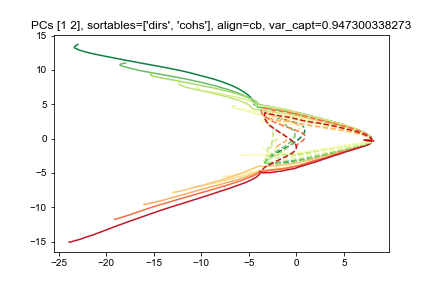

<IPython.core.display.Javascript object>


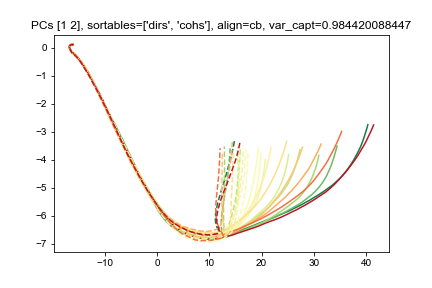

<IPython.core.display.Javascript object>


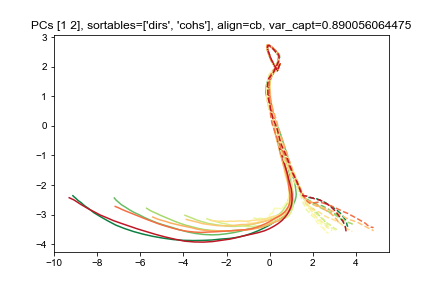

<IPython.core.display.Javascript object>


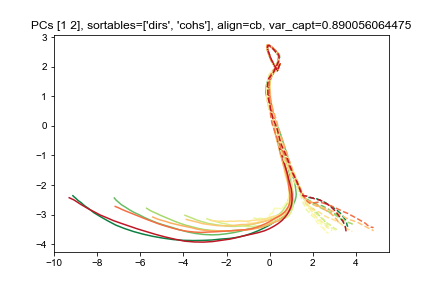

In [6]:
## variance captured for each of the PCs

dyn.plot_pcs_area(window=np.arange(200), is_x=True, partition_idx=0)
dyn.plot_pcs_area(window=np.arange(200), is_x=True, partition_idx=1)
dyn.plot_pcs_area(window=np.arange(200), is_x=True, partition_idx=2)

<IPython.core.display.Javascript object>


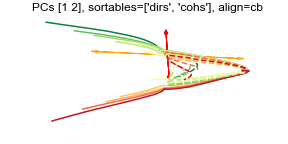

In [24]:
# load axes
dyn.dims = np.array((0,1))

dir_axis = np.load(basePath + 'testing/axes/' + 'dir_axis_J.npy')
dir_axis = dir_axis.reshape(-1)
col_axis = np.load(basePath + 'testing/axes/' + 'col_axis_J.npy')
col_axis = col_axis.reshape(-1)
ctx_axis = np.load(basePath + 'testing/axes/' + 'ctx_axis_J.npy')
ctx_axis = ctx_axis.reshape(-1)

f = plt.figure(figsize=(4,2))
f = dyn.plot_pcs_area(f=f, window=np.arange(180), is_x=True)
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='targets1', f=f, scale=10, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='targets1', f=f, scale=6, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='targets1', f=f, scale=6, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='targets1', f=f, scale=10, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='targets1', f=f, scale=6, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='targets1', f=f, scale=6, arrow_color='red')
ax = f.gca()
ax.axis('off')
f.savefig(savePathD + 'dir_axis_PCs1+2.pdf')

<IPython.core.display.Javascript object>


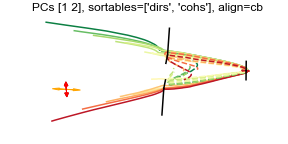

In [25]:
f = plt.figure(figsize=(4,2))
f = dyn.plot_pcs_area(f=f, window=np.arange(180), is_x=True)
f = dyn.plot_input_pcs_area(inputs=[1,-1,0,0], f=f, is_x=True, scale=4, start_loc='baseline')
f = dyn.plot_input_pcs_area(inputs=[-1,1,0,0], f=f, is_x=True, scale=4, start_loc='baseline')
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='Jloc', f=f, scale=1, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='Jloc', f=f, scale=1, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='Jloc', f=f, scale=1, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='Jloc', f=f, scale=1, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='Jloc', f=f, scale=1, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='Jloc', f=f, scale=1, arrow_color='red')
f = dyn.plot_input_pcs_area(inputs=[1,-1,-1,1], f=f, is_x=True, scale=4, start_loc='targets1', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[1,-1,1,-1], f=f, is_x=True, scale=4, start_loc='targets1', arrow_color='r')
f = dyn.plot_input_pcs_area(inputs=[-1,1,-1,1], f=f, is_x=True, scale=4, start_loc='targets2', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[-1,1,1,-1], f=f, is_x=True, scale=4, start_loc='targets2', arrow_color='r')
ax = f.gca()
ax.axis('off')
f.savefig(savePathD + 'PCs+axes+inputs.pdf')

<IPython.core.display.Javascript object>


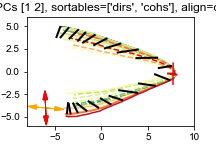

In [45]:
f = plt.figure(figsize=(3,2))

x_sample = 1
y_sample = 1
xmin = 0
xmax = 0
ymin = 0
ymax = 0
scale = 2

dyn.partition_deltas(x_sample=x_sample, y_sample=y_sample, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
inputs = np.array((0,0,0,0))
f = dyn.plot_pcs_area(f=f, window=np.arange(150), is_x=True)
f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(60,150,10, dtype='int'),
                                                    conds = [0,8], scale=scale * dyn.rnn.p['tau'])
f = dyn.plot_input_pcs_area(inputs=[1,-1,0,0], f=f, is_x=True, scale=scale, start_loc='baseline')
f = dyn.plot_input_pcs_area(inputs=[-1,1,0,0], f=f, is_x=True, scale=scale, start_loc='baseline')
#                                                 xlim=[0,5], ylim=[0,5])
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='Jloc2', f=f, scale=1, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='Jloc2', f=f, scale=1, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='Jloc2', f=f, scale=1, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='Jloc2', f=f, scale=1, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='Jloc2', f=f, scale=1, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='Jloc2', f=f, scale=1, arrow_color='red')

ax = f.gca()
ax.set_xlim([-8, 10])
ax.set_ylim([-6,6])
plt.savefig(savePathD + 'dynamics_targ-on.pdf')


In [10]:
dyn.psths[0]['u_psth'][:, 150]

array([ 0.28301887, -0.28301887, -0.00699669,  0.04839375])

In [ ]:
dyn.delta_samples

In [ ]:
dyn.plot_pcs_area(window=np.arange(80), is_x=True)

<IPython.core.display.Javascript object>


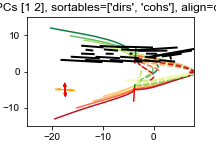

start loc is targets1


In [80]:
scale = 1

f = plt.figure(figsize=(3,2))

dyn.partition_deltas(x_sample=5, y_sample=5, xmin=-25, xmax=25, ymin=-25, ymax=25)
inputs = np.array((1,-1,0,0))
f = dyn.plot_pcs_area(f=f, window=np.arange(180), is_x=True)
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='Jloc', f=f, scale=1, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='Jloc', f=f, scale=1, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='Jloc', f=f, scale=1, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='Jloc', f=f, scale=1, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='Jloc', f=f, scale=1, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='Jloc', f=f, scale=1, arrow_color='red')
f = dyn.plot_input_pcs_area(inputs=[1,-1,-1,1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[1,-1,1,-1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='r')
f = dyn.plot_input_pcs_area(inputs=[-1,1,-1,1], f=f, is_x=True, scale=scale*2, start_loc='targets2', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[-1,1,1,-1], f=f, is_x=True, scale=scale*2, start_loc='targets2', arrow_color='r')
f = dyn.plot_local_dynamics_delta_area_x(f=f, inputs=inputs, t_sample=151, scale=scale*dyn.rnn.p['tau'])

ax = f.gca()
ax.set_xlim([-25, 8])
ax.set_ylim([-15, 15])

plt.savefig(savePathD + 'dynamics_chek_on_local.pdf')

<IPython.core.display.Javascript object>


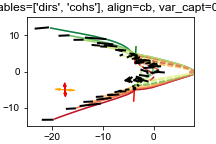

In [85]:
scale = 1

f = plt.figure(figsize=(3,2))

inputs = np.array((1,-1,0,0))
f = dyn.plot_pcs_area(f=f, window=np.arange(180), is_x=True)
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='Jloc', f=f, scale=1, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='Jloc', f=f, scale=1, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='Jloc', f=f, scale=1, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='Jloc', f=f, scale=1, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='Jloc', f=f, scale=1, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='Jloc', f=f, scale=1, arrow_color='red')
f = dyn.plot_input_pcs_area(inputs=[1,-1,-1,1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[1,-1,1,-1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='r')
f = dyn.plot_input_pcs_area(inputs=[-1,1,-1,1], f=f, is_x=True, scale=scale*2, start_loc='targets2', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[-1,1,1,-1], f=f, is_x=True, scale=scale*2, start_loc='targets2', arrow_color='r')
dyn.partition_deltas(x_sample=1, y_sample=1, xmin=0, xmax=0, ymin=0, ymax=0)
inputs = np.array((-1,1,0,0))
f = dyn.plot_pcs_area(f = f, window=np.arange(180), is_x=True, alpha=0.25)
f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(150,180,3, dtype='int'),
                                                    conds = np.linspace(7,13,7, dtype='int'), scale=scale*dyn.rnn.p['tau'])
                                                 #xlim=[-5,0], ylim=[-7.5,2.5])
    
f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(150,180,3, dtype='int'),
                                                    conds = np.linspace(14,20,3, dtype='int'), scale=scale*dyn.rnn.p['tau'])
                                                 #xlim=[-5,0], ylim=[-7.5,2.5])
inputs = np.array((1,-1,0,0))
f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(150,180,3, dtype='int'),
                                                    conds = np.linspace(0,7,7, dtype='int'), scale=scale*dyn.rnn.p['tau'])

f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(150,180,3, dtype='int'),
                                                    conds = np.linspace(21,27,7, dtype='int'), scale=scale*dyn.rnn.p['tau'])
ax = f.gca()
ax.set_xlim([-25, 8])
ax.set_ylim([-15, 15])

plt.savefig(savePathD + 'dynamics_chek_on_local_temporal.pdf')

## Development below

In [ ]:
idx1 = idx1 = np.hstack((np.arange(80), np.arange(240, 260)))

t_input_vec = dyn.rnn.Win[idx1, 0:2]
c_input_vec = dyn.rnn.Win[idx1, 2:4]

conf = np.dot(t_input_vec.T, c_input_vec)
print(conf)

In [ ]:
dyn.plot_neural_traj2d_partition_pub(savepath=savePath, windowStart=20, windowEnd=70)

In [ ]:
#len(dyn.partition_pca)
#dyn.partition_pca[0]
#dyn.partitions
dyn.psths[-1]

In [ ]:
savePathD

In [ ]:
f = plt.figure(figsize=(5,2))
f = dyn.plot_pcs_area(f=f, window=np.arange(180), is_x=True)
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='targets1', f=f, scale=10, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='targets1', f=f, scale=6, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='targets1', f=f, scale=6, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='targets1', f=f, scale=10, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='targets1', f=f, scale=6, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='targets1', f=f, scale=6, arrow_color='red')
ax = f.gca()
ax.axis('off')
f.savefig(savePathD + 'dir_axis_PCs1+2.pdf')

In [ ]:
dyn.dims = np.array((1,2))
f = dyn.plot_pcs_area(window=np.arange(180), is_x=True)
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='targets1', f=f, scale=6, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='targets1', f=f, scale=2, arrow_color='maroon')
#f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='targets1', f=f, scale=2, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='targets1', f=f, scale=6, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='targets1', f=f, scale=2, arrow_color='maroon')
#f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='targets1', f=f, scale=2, arrow_color='red')
f.savefig(savePathD + 'dir_axis_PCs2+3.pdf')

In [ ]:
f = plt.figure()
ax = f.gca(projection="3d")

x = np.array((-1,0,1))
y = np.array((-1,0,1))
z = np.array((-1,0,1))

ax.plot3D(x,y,z)

In [ ]:
dyn.dims = np.arange(3)
f = dyn.plot3_pcs_area(window=np.arange(180), is_x=True)
f = dyn.plot3_pcs_axis(axis=dir_axis, start_loc='targets1', f=f, scale=10, arrow_color='orange')
f = dyn.plot3_pcs_axis(axis=col_axis, start_loc='targets1', f=f, scale=10, arrow_color='maroon')
f = dyn.plot3_pcs_axis(axis=ctx_axis, start_loc='targets1', f=f, scale=10, arrow_color='red')


In [ ]:
f = dyn.plot_pcs_area(window=np.arange(180), is_x=True)
f = dyn.plot_input_pcs_area(inputs=[1,-1,0,0], f=f, is_x=True, scale=5, start_loc='baseline')
f = dyn.plot_input_pcs_area(inputs=[-1,1,0,0], f=f, is_x=True, scale=5, start_loc='baseline')
f.savefig(savePathD + 'PCs+inputs_baseline.pdf')

In [ ]:
f = dyn.plot_pcs_area(window=np.arange(200), is_x=True)
f = dyn.plot_input_pcs_area(inputs=[1,-1,-1,1], f=f, is_x=True, scale=3, start_loc='targets1', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[1,-1,1,-1], f=f, is_x=True, scale=3, start_loc='targets1', arrow_color='r')
f = dyn.plot_input_pcs_area(inputs=[-1,1,-1,1], f=f, is_x=True, scale=5, start_loc='targets2', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[-1,1,1,-1], f=f, is_x=True, scale=5, start_loc='targets2', arrow_color='r')
f.savefig(savePathD + 'PCs+inputs_check.pdf')

In [ ]:
### THIS IS THE ONE WITH FIXED POINTS
f = dyn.plot_pcs_area(window=np.arange(200), is_x=True)
f = dyn.plot_input_pcs_area(inputs=[1,-1,-1,1], f=f, is_x=True, scale=3, start_loc='targets1', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[1,-1,1,-1], f=f, is_x=True, scale=3, start_loc='targets1', arrow_color='r')
f = dyn.plot_input_pcs_area(inputs=[-1,1,-1,1], f=f, is_x=True, scale=5, start_loc='targets2', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[-1,1,1,-1], f=f, is_x=True, scale=5, start_loc='targets2', arrow_color='r')
f = dyn.plot_fixed_points(f=f, inputs=[1,-1,-1,1], type='x', sample=1000)
f = dyn.plot_fixed_points(f=f, inputs=[-1,1,1,-1], type='x', sample=1000)

In [ ]:
dyn.partition_deltas(x_sample=1, y_sample=1, xmin=0, xmax=0, ymin=0, ymax=0)
#dyn.partition_deltas(x_sample=30, y_sample=20, xmin=-500, xmax=500, ymin=-1250, ymax=1250)
inputs = np.array((0,0,0,0))
f = dyn.plot_pcs_area(window=np.arange(180), is_x=True)
f = dyn.plot_local_dynamics_delta_area_x(f=f, inputs=inputs, scale=1)

In [ ]:
np.linspace(0, 0, 1)

In [ ]:
dyn.partition_deltas(x_sample=2, y_sample=2, xmin=-2, xmax=2, ymin=-2, ymax=2)
inputs = np.array((0,0,0,0))
f = dyn.plot_pcs_area(window=np.arange(150), is_x=True)
f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(60,150,11, dtype='int'),
                                                    conds = [0, 8], scale=1)
f = dyn.plot_input_pcs_area(inputs=[1,-1,0,0], f=f, is_x=True, scale=1, start_loc='baseline')
f = dyn.plot_input_pcs_area(inputs=[-1,1,0,0], f=f, is_x=True, scale=1, start_loc='baseline')
#                                                 xlim=[0,5], ylim=[0,5])

In [ ]:
dyn.partition_deltas(x_sample=20, y_sample=20, xmin=-25, xmax=5, ymin=-15, ymax=15)
inputs = np.array((0,0,0,0))
f = dyn.plot_pcs_area(window=np.arange(200), is_x=True)
f = dyn.plot_local_dynamics_delta_area_x_sub_dyn(f=f, inputs=inputs, t_sample=149, scale=1)

In [ ]:
dyn.partition_deltas(x_sample=30, y_sample=20, xmin=-500, xmax=500, ymin=-1250, ymax=1250)
inputs = np.array((1,-1,0,0))
f = dyn.plot_pcs_area(window=np.arange(200), is_x=True)
f = dyn.plot_local_dynamics_delta_area_x(f=f, inputs=inputs, t_sample=149, scale=1)

In [ ]:
dyn.partition_deltas(x_sample=30, y_sample=20, xmin=-500, xmax=500, ymin=-1250, ymax=1250)
inputs = np.array((1,-1,0,0))
f = dyn.plot_pcs_area(window=np.arange(200), is_x=True)
f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f, inputs=inputs, t_sample=149, scale=1)

In [ ]:
dyn.partition_deltas(x_sample=30, y_sample=20, xmin=-500, xmax=500, ymin=-1250, ymax=1250)
inputs = np.array((-1,1,0,0))
f = dyn.plot_pcs_area(window=np.arange(200), is_x=True)
f = dyn.plot_local_dynamics_delta_area_x(f=f, inputs=inputs, t_sample=149, scale=1)

In [ ]:
(np.linspace(150,250,11, dtype='int'))

In [ ]:
[a['cond'] for a in dyn.psths]

In [ ]:
conds = np.linspace(7,13, 7)
print conds

In [ ]:
#dyn.partition_deltas(x_sample=30, y_sample=20, xmin=-500, xmax=500, ymin=-1250, ymax=1250)
dyn.partition_deltas(x_sample=1, y_sample=1, xmin=0, xmax=0, ymin=0, ymax=0)
inputs = np.array((-1,1,0,0))
f = dyn.plot_pcs_area(window=np.arange(200), is_x=True, alpha=0.25)
f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(150,180,3, dtype='int'),
                                                    conds = np.linspace(7,13,7, dtype='int'), scale=1)
                                                 #xlim=[-5,0], ylim=[-7.5,2.5])
    
f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(150,180,3, dtype='int'),
                                                    conds = np.linspace(14,20,3, dtype='int'), scale=1)
                                                 #xlim=[-5,0], ylim=[-7.5,2.5])
inputs = np.array((1,-1,0,0))
f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(150,180,3, dtype='int'),
                                                    conds = np.linspace(0,7,7, dtype='int'), scale=1)

f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(150,180,3, dtype='int'),
                                                    conds = np.linspace(21,27,7, dtype='int'), scale=1)

In [ ]:
dyn.partition_deltas(x_sample=30, y_sample=20, xmin=-500, xmax=500, ymin=-1250, ymax=1250)
inputs = np.array((-1,1,0,0))
f = dyn.plot_pcs_area(window=np.arange(200), is_x=True)
f = dyn.plot_local_dynamics_delta_area_x(f=f, inputs=inputs, t_sample=149, scale=1, 
                                             xlim=[-5,0], ylim=[-7.5,2.5])

In [ ]:
dyn.delta_samples

In [ ]:
# INPUTS = (0,0,0,0)
dyn.partition_deltas(x_sample=50, y_sample=50, xmin=-500, xmax=500, ymin=-2500, ymax=2500)
inputs = np.array((0,0,0,0))
f = dyn.plot_pcs_area(window=np.arange(200), is_x=True)
f = dyn.plot_local_dynamics_delta_area(f=f, inputs=inputs, t_sample=149, scale=0.1, force_alignment='start') #149 is right before cb onset
#f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

In [ ]:
# Generate dynamics plots

# INPUTS = (0,0,0,0)
inputs = np.array((0,0,0,0))
f = dyn.plot_pcs(window=np.arange(10))
f = dyn.plot_local_dynamics_delta(f=f, inputs=inputs, scale=4)
f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

# INPUTS = (1,-1,0,0)
inputs = np.array((1,-1,0,0))
f = dyn.plot_pcs(window=np.arange(100))
f = dyn.plot_local_dynamics_delta(f=f, inputs=inputs, scale=4)
f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

# INPUTS = (-1,1,0,0)
inputs = np.array((-1,1,0,0))
f = dyn.plot_pcs(window=np.arange(100))
f = dyn.plot_local_dynamics_delta(f=f, inputs=inputs, scale=4)
f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

## Plot 3d dyn

In [ ]:
dyn.dims

In [ ]:
%pdb

In [ ]:
dyn.partition_deltas(x_sample=30, y_sample=20, xmin=-500, xmax=500, ymin=-1250, ymax=1250)

#dyn.delta_samples = np.array([[-17.24, 17.24], [-65.78, 65.78]])

dyn.dims = np.array([0,1,2])
inputs = np.array((1,-1,0,0))
f = dyn.plot3_pcs_area(window=np.arange(200), is_x=True)
f = dyn.plot3_local_dynamics_delta_area_x(f=f, inputs=inputs, t_sample=149, scale=1)

In [ ]:
g = f

In [ ]:
f.show()

In [ ]:
f = dyn.plot3_pcs_area(window=np.arange(200), is_x=True)


## Behavioral results

In [ ]:
### ONE DV racer

from pycog.trial_chand import Trial

# # Run trials
trial = Trial(rnnPath, modelPath, rnnparams={'var_in': 0**2, 'var_rec': 0**2}, num_trials=10)

# # Generate behavioral plots
print '\n'
print trial.eval_performance()
trial.plot_all_trials(savepath=savePathB)
trial.psychometric(savepath=savePathB)
trial.reaction_time(savepath=savePathB)
# trial.reaction_time_std(savepath=savePathB)
# trial.reaction_time_hist(savepath=savePathB)
trial.plot_structure(savepath=savePathB)
# clear_output()

In [ ]:
from pycog.trial_chandr import Trial

# # Run trials
trial = Trial(rnnPath, modelPath, rnnparams={'var_in': 0**2, 'var_rec': 0**2}, num_trials=10)

# # Generate behavioral plots
print '\n'
print trial.eval_performance()
trial.plot_all_trials(savepath=savePathB)
trial.psychometric(savepath=savePathB)
trial.reaction_time(savepath=savePathB)
# trial.reaction_time_std(savepath=savePathB)
# trial.reaction_time_hist(savepath=savePathB)
trial.plot_structure(savepath=savePathB)
# clear_output()

In [ ]:
np.where(trial.rnn.Wrec < 0)

In [ ]:
trial.plot_structure(savepath=savePathB)


In [ ]:
trial.plot_all_trials(savepath=savePathB)


In [ ]:
# trial.psychometric(savepath=savePathB, threshold=0.7)
trial.reaction_time(savepath=savePathB)

In [ ]:
%pdb

In [ ]:
print trial.eval_performance()

## PSTHs

In [ ]:
%pdb

In [ ]:
from pycog.trial_chandr import PSTH # PSTH is a subclass of Trial.

# The default psth is sorted by ['dirs', 'cohs'] and aligned to 'cb'
psth = PSTH(rnnPath, modelPath, rnnparams={'var_in': 0**2, 'var_rec': 0**2}, num_trials=20, seed=1)

# Generate PSTHs: sort=['dirs', 'cohs']; align='cb'
psth.gen_psth()
psth.plot_psth_pub(N=10, savepath=savePathP)

# Generate PSTHs: sort=['dirs', 'cohs']; align='mv'
# psth.set_align(align='mv')
# psth.gen_psth()
# psth.plot_psth(N=10, savepath=savePathP)

# Generate PSTHs: sort=['dirs', 'rts']; align='mv'
# psth.sort = ['dirs', 'rts']
# psth.gen_psth(rt_bin=25)
# psth.plot_psth(N=10, savepath=savePathP)

In [ ]:
#### ONE DV output 

from pycog.trial_chand import PSTH # PSTH is a subclass of Trial.

# The default psth is sorted by ['dirs', 'cohs'] and aligned to 'cb'
psth = PSTH(rnnPath, modelPath, rnnparams={'var_in': 0**2, 'var_rec': 0**2}, num_trials=20, seed=1)

# Generate PSTHs: sort=['dirs', 'cohs']; align='cb'
psth.gen_psth()
psth.plot_psth_pub(N=10, savepath=savePathP)

# Generate PSTHs: sort=['dirs', 'cohs']; align='mv'
# psth.set_align(align='mv')
# psth.gen_psth()
# psth.plot_psth(N=10, savepath=savePathP)

# Generate PSTHs: sort=['dirs', 'rts']; align='mv'
# psth.sort = ['dirs', 'rts']
# psth.gen_psth(rt_bin=25)
# psth.plot_psth(N=10, savepath=savePathP)

## Dynamics

In [ ]:
%pdb

In [ ]:
from pycog.trial import Dynamics # PSTH is a subclass of Trial.

dyn = Dynamics(rnnPath, modelPath, rnnparams={'var_in': 0.05**2, 'var_rec': 0.20**2}, num_trials=50, seed=100)

In [ ]:
# Properties of the dyn class
dyn.partition_space(x_sample=15, y_sample=15, xp_min=0, xp_max=0, yp_min=0, yp_max=0);
dyn.fp_threshold = 1e-8

In [ ]:
# Generate PC plots
dyn.plot_pcs(savepath=savePathN)
#dyn.plot_pcs_vs_time(savepath=savePathN)

In [ ]:
# Generate dynamics plots

# INPUTS = (0,0,0,0)
inputs = np.array((0,0,0,0))
f = dyn.plot_pcs(window=np.arange(10))
f = dyn.plot_local_dynamics_delta(f=f, inputs=inputs, scale=4)
f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

# INPUTS = (1,-1,0,0)
inputs = np.array((1,-1,0,0))
f = dyn.plot_pcs(window=np.arange(100))
f = dyn.plot_local_dynamics_delta(f=f, inputs=inputs, scale=4)
f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

# INPUTS = (-1,1,0,0)
inputs = np.array((-1,1,0,0))
f = dyn.plot_pcs(window=np.arange(100))
f = dyn.plot_local_dynamics_delta(f=f, inputs=inputs, scale=4)
f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

In [ ]:
# INPUTS = (-1,1,0.9,-0.9)
dyn.partition_deltas(x_sample=15, y_sample=15, xmin=-3, xmax=4, ymin=-10, ymax=5)
inputs = np.array((-1,1,0.9,-0.9))
f = dyn.plot_pcs()
f = dyn.plot_local_dynamics_delta(f=f, inputs=inputs, scale=4)
f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

# INPUTS = (-1,1,-0.9,0.9)
dyn.partition_deltas(x_sample=15, y_sample=15, xmin=-3, xmax=4, ymin=-5, ymax=5)
inputs = np.array((-1,1,-0.9,0.9))
f = dyn.plot_pcs()
f = dyn.plot_local_dynamics_delta(f=f, inputs=inputs, scale=4)
f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

# INPUTS = (1,-1,-0.9,0.9)
dyn.partition_deltas(x_sample=15, y_sample=15, xmin=-3, xmax=4, ymin=-5, ymax=5)
inputs = np.array((1,-1,-0.9,0.9))
f = dyn.plot_pcs()
f = dyn.plot_local_dynamics_delta(f=f, inputs=inputs, scale=4)
f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

# INPUTS = (1,-1,-0.9,0.9)
dyn.partition_deltas(x_sample=15, y_sample=15, xmin=-3, xmax=4, ymin=-5, ymax=5)
inputs = np.array((1,-1,0.9,-0.9))
f = dyn.plot_pcs()
f = dyn.plot_local_dynamics_delta(f=f, inputs=inputs, scale=4)
f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

In [ ]:
# INPUTS = (-1,1,0.9,-0.9)
dyn.partition_deltas(x_sample=15, y_sample=15, xmin=-3, xmax=4, ymin=-10, ymax=5)
inputs = np.array((-1,1,0.9,-0.9))
f = dyn.plot_pcs(filters=[('dirs', -1), ('cohs', 'r')])
f = dyn.plot_local_dynamics_delta(f=f, inputs=inputs, scale=4)
f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

# INPUTS = (-1,1,-0.9,0.9)
dyn.partition_deltas(x_sample=15, y_sample=15, xmin=-3, xmax=4, ymin=-5, ymax=5)
inputs = np.array((-1,1,-0.9,0.9))
f = dyn.plot_pcs(filters=[('dirs', 1), ('cohs', 'g')])
f = dyn.plot_local_dynamics_delta(f=f, inputs=inputs, scale=4)
f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

# INPUTS = (1,-1,-0.9,0.9)
dyn.partition_deltas(x_sample=15, y_sample=15, xmin=-3, xmax=4, ymin=-5, ymax=5)
inputs = np.array((1,-1,-0.9,0.9))
f = dyn.plot_pcs(filters=[('dirs', -1), ('cohs', 'g')])
f = dyn.plot_local_dynamics_delta(f=f, inputs=inputs, scale=4)
f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

# INPUTS = (1,-1,-0.9,0.9)
dyn.partition_deltas(x_sample=15, y_sample=15, xmin=-3, xmax=4, ymin=-5, ymax=5)
inputs = np.array((1,-1,0.9,-0.9))
f = dyn.plot_pcs(filters=[('dirs', 1), ('cohs', 'r')])
f = dyn.plot_local_dynamics_delta(f=f, inputs=inputs, scale=4)
f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

In [ ]:
# INPUTS = (-1,1,0.9,-0.9)
dyn.partition_space(x_sample=15, y_sample=15, xp_min=0, xp_max=0, yp_min=0, yp_max=3);
inputs = np.array((-1,1,0.9,-0.9))
f = dyn.plot_pcs()
f = dyn.plot_local_dynamics_delta(f=f, inputs=inputs, scale=4)
f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

# INPUTS = (-1,1,-0.9,0.9)
dyn.partition_space(x_sample=15, y_sample=15, xp_min=-7, xp_max=12, yp_min=-1, yp_max=0);
inputs = np.array((-1,1,-0.9,0.9))
f = dyn.plot_pcs()
f = dyn.plot_local_dynamics_delta(f=f, inputs=inputs, scale=4)
f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

# INPUTS = (1,-1,-0.9,0.9)
dyn.partition_space(x_sample=15, y_sample=15, xp_min=0, xp_max=0, yp_min=0, yp_max=0)
inputs = np.array((1,-1,-0.9,0.9))
f = dyn.plot_pcs()
f = dyn.plot_local_dynamics_delta(f=f, inputs=inputs, scale=4)
f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

# INPUTS = (1,-1,-0.9,0.9)
dyn.partition_space(x_sample=15, y_sample=15, xp_min=0, xp_max=0, yp_min=0, yp_max=0)
inputs = np.array((1,-1,0.9,-0.9))
f = dyn.plot_pcs()
f = dyn.plot_local_dynamics_delta(f=f, inputs=inputs, scale=4)
f = dyn.plot_fixed_points(f=f, inputs=inputs)
f.savefig(savePathD + 'dynamics_input={}.pdf'.format(inputs))

In [ ]:

def plot_input_push(rnn, x0, f=None, rnn_in=np.array((0,0,0,0)), evecs=None, means=None, dims=np.array((0,1)), scale=1, color=None, linestyle=None):

    if color is None:
        if rnn_in[2] > rnn_in[3]:
            color = 'r'
        elif rnn_in[3] > rnn_in[2]:
            color = 'g'
        else:
            color = 'y'

    if linestyle is None:
        linestyle='-'
    
    # This is the contribution to xdot from the input
#    xdot_inputs = np.matmul(rnn.Win, rnn_in) / rnn.p['tau']
    rdot_inputs = rnn_rdot(x0, rnn, rnn_in)
    
    sdot = np.matmul(evecs[:, dims].T, rdot_inputs)
                    
    sdot = sdot * 1000 / rnn.p['dt'] * scale # since dt = 10ms

    # Now, plot it on the figure.
          
    s = np.dot(evecs[:, dims].T, relu(x0) - means)    
        
    if f is None:
        f = plt.figure()
        
    ax = f.gca()
    ax.arrow(s[0], s[1], sdot[0], sdot[1], color=color, head_width=0.2, head_length=0.4, linestyle=linestyle)
                    
    return f


def plot_sts(psth, trials, dims=np.array((0,1)), f=None, save=False, num_trials=1, cond=None, dir=None, end_pt=None, evecs=None, means=None):
# end_pt can be 'targets', 'check', 'end'

    assert ~np.any(np.isnan(np.hstack(psth))), 'There are some NaNs in your PSTH.  Is it right?'
    
#     evecs, evals, scores, means = pca(np.hstack(psth))
    
    if f is None:
        f = plt.figure()
        ax = f.gca()
    else:
        ax = f.gca()

    # plots single trial trajectories
    # numTrajs is the number of trajectories to plot for each condition.
    dirs = np.array([trial['dir'] for trial in trials]) # -1 is left, +1 is right
    conds = np.array([trial['info']['cond'] for trial in trials]) # in terms of num red squares
    
    post_delays = [trial['info']['post_delay'] for trial in trials] # post delays
    target_ons = [trial['info']['start_delay'] for trial in trials] # target ons
    check_ons = [trial['info']['start_delay'] + trial['info']['check_drawn'] for trial in trials] # check drawns
    rts = [trial['rt'] for trial in trials] # already in dt units
    dt = trials[0]['info']['dt']
    
    idx_dirs = np.where(dirs == dir)[0]
    idx_conds = np.where(conds == cond)[0]
    
    idx = np.intersect1d(idx_dirs, idx_conds)
    assert idx is not None, 'There are no trials of this type.'
    
    linestyle = '--' if dir == -1 else '-'
    color = cm.RdYlGn((1 - coh_r(cond)) / 2)
    
    for i in np.arange(num_trials):
        
        if end_pt is None or end_pt == 'end':
            stop = -10 - post_delays[idx[i]] // dt
        elif end_pt == 'targets':
            stop = target_ons[idx[i]] // dt
        elif end_pt == 'check':
            stop = check_ons[idx[i]] // dt
        elif end_pt == 'rt':
            stop = check_ons[idx[i]] // dt + rts[i]
        else:
            assert False, 'No valid end point type'
        
        these_scores = np.dot(evecs[:, dims].T, (trials[idx[i]]['r'][:, :stop].T - means).T)
        ax.plot(these_scores[0], these_scores[1], linestyle=linestyle, color=color)
        
    return f
    

In [ ]:
from pycog.trial_chand import PSTH # PSTH is a subclass of Trial.

# The default psth is sorted by ['dirs', 'cohs'] and aligned to 'cb'
psth = PSTH(rnnPath, modelPath, rnnparams={'var_in': 0, 'var_rec': 0}, num_trials=10, seed=1)

In [ ]:
%pdb

In [ ]:
psth.sort = ['cohs']
psth.set_align(align='mv')
psth.gen_psth()

In [ ]:
pds = psth.calc_pds()

In [ ]:
choice_probs = psth.choice_prob()

In [ ]:
psth.sort = ['scols']
psth.set_align(align='mv')
psth.gen_psth()

In [ ]:
choice_probs = psth.choice_prob()

In [ ]:
psth.scatter_choice_pub()

In [ ]:
### Choice probability functions

# Calculates the preferred directions for neurons
def calc_pds(trials, align='mv', bounds=[-500, 200]):
    # Computes the directional and coherence preferred direction, for the purposes of later calculating ROC curves.
    # align is where the psth's are aligned to;
    # bounds are where you take the mean firing rate over with respect to align, i.e.,
    #     align + bounds[0] to align + bounds[1]
    
    # c_psths are psths sorted by coherence
    # p_psths are psths sorted by prompted direction
    # r_psths are psths sorted by reach direction
    
    c_conds, c_psths, align_time = psths(trials, sort='coh', align=align)
    p_conds, p_psths, _ = psths(trials, sort='pdir', align=align)
    r_conds, r_psths, _ = psths(trials, sort='dir', align=align)
    
    # Initialize appropriate variables to calculate pds
    N = len(c_psths[0][:,0]) # the number of neurons
    pds = {}
    pds['coh'] = np.ones(N) * np.NaN
    pds['pdir'] = np.ones(N) * np.NaN
    pds['dir'] = np.ones(N) * np.NaN

    # We're always going to compare polar opposites. 0 is left or red, 1 is right or green
    cp = c_psths[0], c_psths[-1]
    pp = p_psths[0], p_psths[-1]
    rp = r_psths[0], r_psths[-1]
    
    # Iterate over all the neurons
    for i in np.arange(N):

        # Let's look at the average in the desired range.
        diff_c_1to0 = np.mean(cp[1][i, align_time + bounds[0] : align_time + bounds[1]] - cp[0][i, align_time + bounds[0] : align_time + bounds[1]])
        diff_p_1to0 = np.mean(pp[1][i, align_time + bounds[0] : align_time + bounds[1]] - pp[0][i, align_time + bounds[0] : align_time + bounds[1]])
        diff_r_1to0 = np.mean(rp[1][i, align_time + bounds[0] : align_time + bounds[1]] - rp[0][i, align_time + bounds[0] : align_time + bounds[1]])
    
        # assign
        pds['coh'][i] = diff_c_1to0 < 0
        pds['pdir'][i] = diff_p_1to0 > 0
        pds['dir'][i] = diff_r_1to0 > 0
        
    return pds
    
    

# Function to extract trials by a value of condition
def exTrials_by_cond(trials, sort='coh', value=11):

    # sort is the type you want to sort trials by, and value of the sorting you want to extract.
    if sort == 'coh':
        conds = [trial['info']['cond'] for trial in trials]
    elif sort == 'pdir':
        conds = [trial['info']['choice'] for trial in trials]
    elif sort == 'dir':
        conds = [trial['dir'] for trial in trials]
    else: 
        assert False, 'No valid sorting type.'
    
    # The values in conds are np.int64's
    value = np.int64(value)
    
    # grab values of the conditions
    idxCond = np.where(conds == value)[0]
    
    return [trials[idx] for idx in idxCond]    
    
    # Choice probability

# Function to calculate average rate in a window for a given list of trials
def window_rate(trials, align='mv', bounds=[-500, 200]):
    # bounds are the windows around the alignment.
    # this returns an N x num_trials matrix, where N is the number of neurons, num_trials is the number of trials
    
    if align == 'mv':
        alignTime = [int(trial['rt'] + trial['info']['epochs']['check'][0]) for trial in trials]
    elif align == 'cb':
        alignTime = [int(trial['info']['epochs']['check'][0]) for trial in trials]
    else:
        assert False, 'No valid align time.'
    
    N = len(trials[0]['r'][:,0])
    num_trials = len(trials)
    
    rates = np.zeros((N, num_trials))
    
    for i in np.arange(num_trials):
        
        rates[:,i] = np.mean(trials[i]['r'][:, alignTime[i] + bounds[0]:alignTime[i] + bounds[1]], axis=1)
        
    return rates
    
    

# Gets empirical distributions of rates
def fr_dist(rates, min_fr=0, max_fr=100, bins=100):
    
    # call histogram
    hist, edges = np.histogram(rates, bins=bins, range=(min_fr, max_fr))
    
    return (edges, hist)
    

# Choice probability for one neuron
def choice_prob_single(rates, bins=100, savename=None):
    # rates is a list
    # rates[0] are single trial rates for the anti-preferred direction; dimensions are num_trials
    # rates[1] are single trial rates for the preferred direction; dimensions are num_trials
    min_fr = min(min(rates[0]), min(rates[1]))
    max_fr = max(max(rates[0]), max(rates[1]))
    
    edges, rdist0 = fr_dist(rates[0], min_fr=min_fr, max_fr=max_fr, bins=bins)
    _, rdist1 = fr_dist(rates[1], min_fr=min_fr, max_fr=max_fr, bins=bins)
        
    rdist0 = rdist0 / len(rates[0])
    rdist1 = rdist1 / len(rates[1])
    
    cdist0 = np.cumsum(rdist0)
    cdist1 = np.cumsum(rdist1)
    
    cdist0 = np.insert(cdist0, 0, 0) # incase there's a large instance of 0 firing rates
    cdist1 = np.insert(cdist1, 0, 0) # incase there's a large instance of 0 firing rates
    
    fpr = np.flipud(1 - cdist0) # false positive rate
    tpr = np.flipud(1 - cdist1) # true positive rate
    cp = np.trapz(tpr, fpr)
        
    if savename is not None:
        f = plt.figure()
        
        plt.plot(fpr, tpr)
        plt.title('Choice probability: {}'.format(cp))
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.xlim([-0.1, 1.1])
        plt.ylim([-0.1, 1.1])
        
        f.savefig(savePathC + savename + '.pdf')

        plt.close(f)
        
    return cp
    
    
    

# Choice probability for all neurons
def choice_prob(trials, pds=None, min_fr=0, debug=None):
    
    # Get preferred directions
    #if pds is None:
         #pds = calc_pds(trials)
    
    # Initialization
    #N = len(pds['coh']) # number of neurons
    N = len(trials[0]['r'][:,0])
    
    if debug is not None:
        N = debug
    
    cps = {}
    cps['coh'] = np.ones(N) * np.NaN
    cps['pdir'] = np.ones(N) * np.NaN
    
    # extract single trial rates
    ratesGreen = window_rate(exTrials_by_cond(trials, sort='coh', value=11))
    ratesRed = window_rate(exTrials_by_cond(trials, sort='coh', value=214))
    ratesLeft = window_rate(exTrials_by_cond(trials, sort='pdir', value=-1))
    ratesRight = window_rate(exTrials_by_cond(trials, sort='pdir', value=1))

    backspaces = 0

    for i in np.arange(N):
        
        # Display important information
        s = ("\r Choice probabiliy neuron {}".format(i))
        sys.stdout.write(backspaces*'\b' + s)
        sys.stdout.flush()
        backspaces = len(s)

        if np.mean(np.concatenate((ratesRed[i,:], ratesGreen[i,:]))) >= min_fr:
            # Calculate choice probability for neuron i under color
            if np.mean(ratesGreen[i,:]) > np.mean(ratesRed[i,:]): #pds['coh'][i]:
                # preferred direction is green
                cp_coh = choice_prob_single((ratesRed[i,:], ratesGreen[i,:]), savename='cp_coh_neuron={}'.format(i))
            else:
                # preferred direction is red
                cp_coh = choice_prob_single((ratesGreen[i,:], ratesRed[i,:]), savename='cp_coh_neuron={}'.format(i))
        else:
            cp_coh = np.NaN
            
        if np.mean(np.concatenate((ratesLeft[i,:], ratesRight[i,:]))) >= min_fr:
            # Calculate choice probability for neuron i under prompted direction
            if np.mean(ratesRight[i,:]) > np.mean(ratesLeft[i,:]): #pds['pdir'][i]:
                # preferred direction is right
                cp_pdir = choice_prob_single((ratesLeft[i,:], ratesRight[i,:]), savename='cp_pdir_neuron={}'.format(i))
            else:
                cp_pdir = choice_prob_single((ratesRight[i,:], ratesLeft[i,:]), savename='cp_pdir_neuron={}'.format(i))
        else:
            cp_pdir = np.NaN
            
        # Assign
        cps['coh'][i] = cp_coh
        cps['pdir'][i] = cp_pdir

    return cps

# Scatter plot of coherence vs direction choice probability
def scatter_cps(cps, nn=None):
    # nn is an array of arrays; each array gets its own color, and the numbers in each array is the neurons in that category
    
    if nn is None:
        nn = [np.arange(0, len(cps['coh']))]
    
    f = plt.figure()
    leg_handles = []
    leg_labels = []
    
    red = Color('red')
    blue = Color('blue')
    cols = list(blue.range_to(red, len(nn)))
        
    for i in np.arange(len(nn)):
        sh = plt.scatter(cps['coh'][np.ix_(nn[i])], cps['pdir'][np.ix_(nn[i])], color=cols[i].rgb)
        leg_handles.append(sh)
        leg_labels.append('Neurons {} to {}'.format(nn[i][0] + 1, nn[i][-1] + 1))
        
    plt.xlabel('Choice probability (coherence)')
    plt.ylabel('Choice probability (direction)')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title('{} neuron network'.format(nn[-1][-1] + 1))
    plt.legend(leg_handles, leg_labels, loc='lower left')
    f.savefig(savePathC + '0_cp_pdir_vs_coh.pdf')
    plt.close()
    

# Distribution of cps
def dist_cps(cps, sort='coh', nn=None):
    # nn is an array of arrays; each array gets its own color, and the numbers in each array is the neurons in that category

    if nn is None:
        nn = [np.arange(0, len(cps['coh']))]
    
    f = plt.figure()
    leg_handles = []
    leg_labels = []
    
    red = Color('red')
    blue = Color('blue')
    cols = list(blue.range_to(red, len(nn)))
    
    bar_width = 0.025
    bins = np.arange(0.5, 1, bar_width)

    for i in np.arange(len(nn)):
        # grab cps to histogram
        cpe = cps[sort][np.ix_(nn[i])]
        cpe = cpe[~np.isnan(cpe)]
        
        h_vals, bin_edges = np.histogram(cpe, bins)
        h_vals = h_vals / np.sum(h_vals)
        hh = plt.bar(bin_edges[:-1], h_vals, bar_width, color=cols[i].rgb, alpha=0.1)
        plt.axvline(np.median(cpe), color=cols[i].rgb)
        leg_handles.append(hh)
        leg_labels.append('Neurons {} to {}'.format(nn[i][0] + 1, nn[i][-1] + 1))
    
    plt.xlabel('Choice probability ({})'.format(sort))
    plt.xlabel('Choice probability')
    plt.ylabel('Proportion of bins')
    plt.legend(leg_handles, leg_labels, loc='best')
    f.savefig(savePathC + '0_dist_cp_{}.pdf'.format(sort))

In [ ]:
### Choice probability

# Get preferred directions
#pds = calc_pds(trials[0:7000])

# Find out if it fires more for a condition, either it be left-right or green-red
cps = choice_prob(trials_suc_p_rt, min_fr=0)

# Scatter CPs

if len(trials[0]['r'][:,0]) == 300:
    nn = [np.arange(0,100), np.arange(100,200), np.arange(200, 300)]
elif len(trials[0]['r'][:,0]) == 400:
    nn = [np.arange(0,100), np.arange(100,200), np.arange(200, 300), np.arange(300,400)]
elif len(trials[0]['r'][:,0]) == 200:
    nn = [np.arange(0,100), np.arange(100,200)]
elif len(trials[0]['r'][:,0]) == 500:
    nn = [np.arange(0,100), np.arange(100,200), np.arange(200, 300), np.arange(300,400), np.arange(400, 500)]
else: 
    nn = [np.arange(0,100)]
    
scatter_cps(cps, nn)

# Distribution of CPs
dist_cps(cps, sort='coh', nn=nn)
dist_cps(cps, sort='pdir', nn=nn)
plt.show()
clear_output()